In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
df= pd.read_csv('DATA.csv')
print(df)

           STATION          NAME        DATE  TAVG  TMAX  TMIN
0      IN018103100   PATIALA, IN  1990-01-01    50  58.0  46.0
1      IN018103100   PATIALA, IN  1990-01-02    44  53.0  41.0
2      IN018103100   PATIALA, IN  1990-01-03    46  55.0  41.0
3      IN018103100   PATIALA, IN  1990-01-04    49  54.0   NaN
4      IN018103100   PATIALA, IN  1990-01-05    53   NaN  45.0
...            ...           ...         ...   ...   ...   ...
42963  INM00042071  AMRITSAR, IN  2021-01-09    51  61.0  49.0
42964  INM00042071  AMRITSAR, IN  2021-01-10    50  55.0   NaN
42965  INM00042071  AMRITSAR, IN  2021-01-11    47  54.0  45.0
42966  INM00042071  AMRITSAR, IN  2021-01-12    47   NaN   NaN
42967  INM00042071  AMRITSAR, IN  2021-01-13    49  57.0  38.0

[42968 rows x 6 columns]


In [2]:
df.TMAX.fillna(df.TAVG,inplace = True)

In [3]:
df.TMIN.fillna(df.TAVG,inplace = True)


In [4]:
# Stations
df['STATION'].unique()

array(['IN018103100', 'IN006031000', 'PK000041640', 'INM00042071'],
      dtype=object)

In [5]:
# Number of unique stations
len(df['STATION'].unique())

4

In [6]:
df = df.sort_values(by='DATE')
df.head()


,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,IN018103100,"PATIALA, IN",1990-01-01,50,58.0,46.0
22022,PK000041640,"LAHORE CITY, PK",1990-01-01,53,62.0,44.0
32124,INM00042071,"AMRITSAR, IN",1990-01-01,47,60.0,47.0
10854,IN006031000,"HISSAR, IN",1990-01-01,46,58.0,46.0
32125,INM00042071,"AMRITSAR, IN",1990-01-02,48,61.0,48.0


In [7]:
decade = df[(df['DATE'] >= '2009-01-01') & (df['DATE'] < '2020-01-01')]
decade.head()
print(decade['DATE'].max())
print(decade['DATE'].min())

2019-12-31
2009-01-01


In [8]:
year_2020 = df[(df['DATE'] >= '2020-01-01')& (df['DATE'] < '2021-01-01')]
year_2020['DATE'].min()

'2020-01-01'

In [9]:
# Change date to datetime formats
decade['DATE'] = pd.to_datetime(decade['DATE'])
year_2020['DATE']=pd.to_datetime(year_2020['DATE'])

<ipython-input-9-226c37b38f8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade['DATE'] = pd.to_datetime(decade['DATE'])
<ipython-input-9-226c37b38f8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2020['DATE']=pd.to_datetime(year_2020['DATE'])


In [10]:
year_2020['MONTH']=pd.DatetimeIndex(year_2020['DATE']).month
year_2020['DAY']=pd.DatetimeIndex(year_2020['DATE']).day
year_2020.head()

<ipython-input-10-cdeff4b2026f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2020['MONTH']=pd.DatetimeIndex(year_2020['DATE']).month
<ipython-input-10-cdeff4b2026f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2020['DAY']=pd.DatetimeIndex(year_2020['DATE']).day


,STATION,NAME,DATE,TAVG,TMAX,TMIN,MONTH,DAY
42589,INM00042071,"AMRITSAR, IN",2020-01-01,45,45.0,36.0,1,1
31745,PK000041640,"LAHORE CITY, PK",2020-01-01,45,45.0,45.0,1,1
21643,IN006031000,"HISSAR, IN",2020-01-01,49,49.0,34.0,1,1
10475,IN018103100,"PATIALA, IN",2020-01-01,49,49.0,35.0,1,1
10476,IN018103100,"PATIALA, IN",2020-01-02,54,70.0,42.0,1,2


In [11]:
#Create a month columns
decade['MONTH'] = pd.DatetimeIndex(decade['DATE']).month
decade['DAY'] = pd.DatetimeIndex(decade['DATE']).day
decade.head()

<ipython-input-11-c1d3926b13fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade['MONTH'] = pd.DatetimeIndex(decade['DATE']).month
<ipython-input-11-c1d3926b13fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade['DAY'] = pd.DatetimeIndex(decade['DATE']).day


,STATION,NAME,DATE,TAVG,TMAX,TMIN,MONTH,DAY
38604,INM00042071,"AMRITSAR, IN",2009-01-01,48,64.0,34.0,1,1
6506,IN018103100,"PATIALA, IN",2009-01-01,49,64.0,49.0,1,1
17665,IN006031000,"HISSAR, IN",2009-01-01,54,70.0,42.0,1,1
27832,PK000041640,"LAHORE CITY, PK",2009-01-01,56,70.0,56.0,1,1
6507,IN018103100,"PATIALA, IN",2009-01-02,47,60.0,42.0,1,2


In [12]:
grouped_max = decade.groupby(['MONTH','DAY']).max()
grouped_min = decade.groupby(['MONTH','DAY']).min()

In [13]:
grouped_max = grouped_max.reset_index()
grouped_min = grouped_min.reset_index()


In [14]:
# Drop Leap Day
grouped_max = grouped_max.drop(grouped_max[(grouped_max['DAY'] == 29) & (grouped_max['MONTH'] == 2)].index)
grouped_min = grouped_min.drop(grouped_min[(grouped_min['DAY'] == 29) & (grouped_min['MONTH'] == 2)].index)
grouped_min.shape
grouped_max = grouped_max.reset_index()
grouped_min = grouped_min.reset_index()

In [15]:

year_2020['DATE'] = pd.to_datetime(year_2020['DATE'])
year_2020_max = year_2020.groupby('DATE').max()
year_2020_min = year_2020.groupby('DATE').min()
print(year_2020_max.shape)
print(year_2020_min.shape)

<ipython-input-15-81a41a78aac4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2020['DATE'] = pd.to_datetime(year_2020['DATE'])


(366, 7)
(366, 7)


In [16]:
#mine
year_2020_max = year_2020_max.drop(year_2020_max[(year_2020_max['DAY'] == 29) & (year_2020_max['MONTH'] == 2)].index)
year_2020_min = year_2020_min.drop(year_2020_min[(year_2020_min['DAY'] == 29) & (year_2020_min['MONTH'] == 2)].index)

In [17]:
year_2020_max

,STATION,NAME,TAVG,TMAX,TMIN,MONTH,DAY
DATE,,,,,,,
2020-01-01,PK000041640,"PATIALA, IN",49,49.0,45.0,1,1
2020-01-02,PK000041640,"PATIALA, IN",54,70.0,51.0,1,2
2020-01-03,PK000041640,"PATIALA, IN",56,70.0,53.0,1,3
2020-01-04,PK000041640,"PATIALA, IN",53,73.0,53.0,1,4
2020-01-05,PK000041640,"PATIALA, IN",56,69.0,45.0,1,5
...,...,...,...,...,...,...,...
2020-12-27,PK000041640,"PATIALA, IN",57,65.0,47.0,12,27
2020-12-28,PK000041640,"PATIALA, IN",53,72.0,49.0,12,28
2020-12-29,PK000041640,"PATIALA, IN",50,64.0,49.0,12,29


In [18]:
year_2020_max = year_2020_max.reset_index() 
year_2020_min = year_2020_min.reset_index()


In [19]:
year_2020_max


,DATE,STATION,NAME,TAVG,TMAX,TMIN,MONTH,DAY
0,2020-01-01,PK000041640,"PATIALA, IN",49,49.0,45.0,1,1
1,2020-01-02,PK000041640,"PATIALA, IN",54,70.0,51.0,1,2
2,2020-01-03,PK000041640,"PATIALA, IN",56,70.0,53.0,1,3
3,2020-01-04,PK000041640,"PATIALA, IN",53,73.0,53.0,1,4
4,2020-01-05,PK000041640,"PATIALA, IN",56,69.0,45.0,1,5
...,...,...,...,...,...,...,...,...
360,2020-12-27,PK000041640,"PATIALA, IN",57,65.0,47.0,12,27
361,2020-12-28,PK000041640,"PATIALA, IN",53,72.0,49.0,12,28
362,2020-12-29,PK000041640,"PATIALA, IN",50,64.0,49.0,12,29
363,2020-12-30,PK000041640,"PATIALA, IN",49,60.0,49.0,12,30


In [20]:
#year_2020_max.to_csv("2020max2.csv")
#year_2020_min.to_csv("2020min2.csv")

In [21]:
#year_2020_max=pd.read_csv('2020max2.csv')
#year_2020_min=pd.read_csv('2020min2.csv')

In [22]:
#grouped_max["TMAX"].fillna(30)
#grouped_min["TMIN"].fillna(20)


In [23]:
year_2020_max

,DATE,STATION,NAME,TAVG,TMAX,TMIN,MONTH,DAY
0,2020-01-01,PK000041640,"PATIALA, IN",49,49.0,45.0,1,1
1,2020-01-02,PK000041640,"PATIALA, IN",54,70.0,51.0,1,2
2,2020-01-03,PK000041640,"PATIALA, IN",56,70.0,53.0,1,3
3,2020-01-04,PK000041640,"PATIALA, IN",53,73.0,53.0,1,4
4,2020-01-05,PK000041640,"PATIALA, IN",56,69.0,45.0,1,5
...,...,...,...,...,...,...,...,...
360,2020-12-27,PK000041640,"PATIALA, IN",57,65.0,47.0,12,27
361,2020-12-28,PK000041640,"PATIALA, IN",53,72.0,49.0,12,28
362,2020-12-29,PK000041640,"PATIALA, IN",50,64.0,49.0,12,29
363,2020-12-30,PK000041640,"PATIALA, IN",49,60.0,49.0,12,30


In [24]:
record_high = year_2020_max[year_2020_max['TMAX'] > grouped_max['TMAX']]
record_low = year_2020_min[year_2020_min['TMIN'] < grouped_min['TMIN']]

In [25]:
# x ticks
#xticks = (pd.date_range('1/1/2015','31/12/2015', freq = 'M')  + pd.Timedelta('1D')).strftime('%-j').astype(int)
#xticks

In [26]:
xticks=[1,32,60, 91, 121, 152, 182, 213, 244, 274, 305, 335,]

In [27]:
xticks

[1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

In [28]:
xticks_labels = pd.to_datetime(xticks, format = '%j').strftime('%b')
xticks_labels

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')

<IPython.core.display.Javascript object>


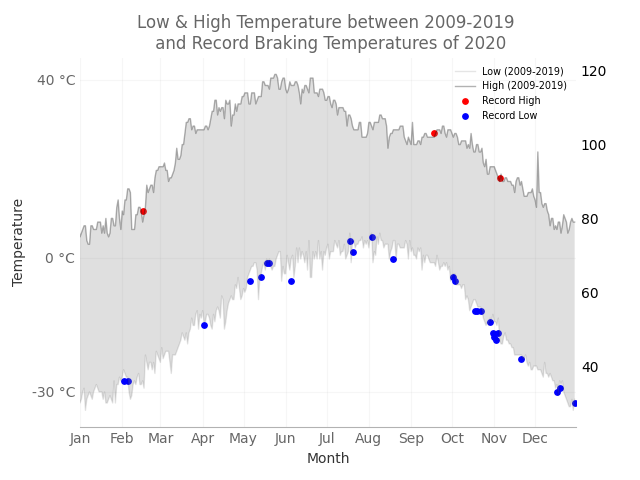

In [29]:
# create a new image

%matplotlib notebook

plt.figure()  
  
ax1 = plt.gca() # Primary axes
ax2 = ax1.twinx() # Seondary Axis

plt.scatter(record_high.index,record_high['TMAX'], color = 'r', s = 15)
plt.scatter(record_low.index,record_low['TMIN'], color = 'b', s = 15)

ax2.plot(grouped_min['TMIN'], '-',color ='k', alpha = 0.1,  linewidth=1)
ax2.plot(grouped_max['TMAX'],'-', color ='k', alpha = 0.3,  linewidth=1)
ax2.fill_between(grouped_min.index, 
                       grouped_min['TMIN'], grouped_max['TMAX'], 
                       facecolor='gray', 
                       alpha=0.25)
ax2.set_xlim(1,365)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks_labels, alpha = 0.6)
ax1.set_xticklabels(xticks_labels, alpha = 0.6)
ax2.set_title('Low & High Temperature between 2009-2019 \n and Record Braking Temperatures of 2020', alpha =0.6)

# Set y tick Labels
axlim = ax1.set_ylim(-380,450)
yticks = pd.Series([-300,0,400])
ax1.set_yticks(yticks)
# yticks = (ax.get_yticks() / 10).astype(int)
ylabels = pd.Series(yticks/10).astype(int).astype(str) + ' °C'
ax1.set_yticklabels(ylabels, alpha = 0.6)

#Secondary y-axis labels
#Convert to fahrenheit from celcius
#ax2.set_ylim(axlim)
#ax2.set_yticks(yticks)
#yticks_ax2 = (yticks/10 *  (9/5) + 32).astype(int)
#ylabels_ax2 = pd.Series(yticks_ax2).astype(int).astype(str) + ' °F'
#ax2.set_yticklabels(ylabels_ax2, alpha = 0.6)

# Shaded Gray background
# start = pd.Series(xticks).iloc[::2]
# end = pd.Series(xticks).iloc[1::2]
# for s, e in zip(start, end):
#     ax1.axvspan(s,e, alpha=0.02, color='k', linewidth = 0)

ax1.grid(True, alpha = 0.1)


# invisible Frame
for spine in ax2.spines:
    ax2.spines[spine].set_visible(False)
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
    
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_alpha(0.3)

# Removing Ticks
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)

# Labels
ax1.set_xlabel('Month', alpha = 0.8)
ax1.set_ylabel('Temperature' , alpha = 0.8)

# legend
leg = ax2.legend(labels = ['Low (2009-2019)','High (2009-2019)','Record High','Record Low'], frameon = False, fontsize = 'x-small')
plt.show()
plt.savefig('visual2.pdf')

In [30]:
import scipy as spy
from scipy import optimize

In [31]:
M=100
N=15
A=np.ones([M,N])

<IPython.core.display.Javascript object>


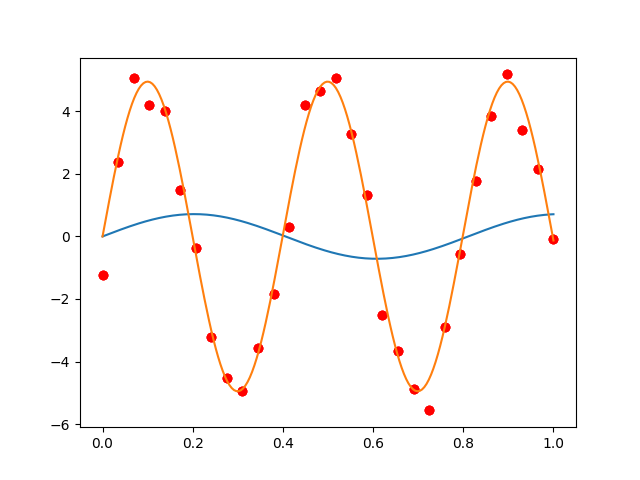

[0.71392779 2.46642688]
[4.950393   5.00826925]


In [32]:
%matplotlib notebook

def f(x, a, b):
    return a*np.sin(b*np.pi*x)

p = [5, 5]
x = np.linspace(0, 1, 30)
y = f(x, *p) + .5*np.random.normal(size=len(x))
xn = np.linspace(0, 1, 200)

plt.plot(x, y, 'or')
plt.show()
popt, pcov = optimize.curve_fit(f, x, y)

print (popt)

plt.plot(x, y, 'or')
plt.plot(xn, f(xn, *popt))
plt.show()

p0 = [3, 4]
popt, pcov = optimize.curve_fit(f, x, y, p0=p0)
print (popt)

plt.plot(x, y, 'or')
plt.plot(xn, f(xn, *popt))

plt.show()


[[0.67204271 0.73896768]
 [0.96204643 0.25974884]
 [0.17087927 0.70747664]
 [0.60603855 0.72135657]
 [0.97678426 0.29232964]
 [0.73432079 0.35591272]
 [0.30692636 0.45338407]
 [0.54616162 0.7630148 ]
 [0.09605453 0.15398168]
 [0.96576789 0.37117343]]
[[ 0.56225993]
 [-0.13338582]]


<IPython.core.display.Javascript object>


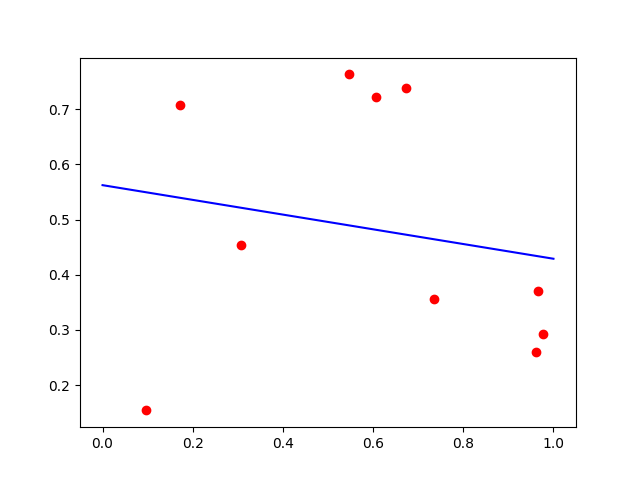

In [33]:
%matplotlib notebook
# Random data
N = 10
M = 2
input = np.random.random((N,M))
print(input) 

# Setup matrices
m = np.shape(input)[0]
X = np.matrix([np.ones(m), input[:,0]]).T
y = np.matrix(input[:,1]).T

# Solve for projection matrix
p_mat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print (p_mat)

# Find regression line
xx = np.linspace(0, 1, 2)
yy = np.array(p_mat[0] + p_mat[1] * xx)

# Plot data, regression line
plt.figure(1)
plt.plot(xx, yy.T, color='b')
plt.scatter(input[:,0], input[:,1], color='r')
plt.show()


In [716]:
M=365
#N=15
#A=np.ones([M,N])
x=list(range(0,365))
x[0]


0

In [717]:
N =8
A=np.vander(x, N)
A


array([[                 0,                  0,                  0, ...,
                         0,                  0,                  1],
       [                 1,                  1,                  1, ...,
                         1,                  1,                  1],
       [               128,                 64,                 32, ...,
                         4,                  2,                  1],
       ...,
       [814629238681812608,   2250357012933184,      6216455836832, ...,
                    131044,                362,                  1],
       [830512886046548067,   2287914286629609,      6302794178043, ...,
                    131769,                363,                  1],
       [846661254115016704,   2325992456359936,      6390089165824, ...,
                    132496,                364,                  1]])

In [718]:
df


,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,IN018103100,"PATIALA, IN",1990-01-01,50,58.0,46.0
22022,PK000041640,"LAHORE CITY, PK",1990-01-01,53,62.0,44.0
32124,INM00042071,"AMRITSAR, IN",1990-01-01,47,60.0,47.0
10854,IN006031000,"HISSAR, IN",1990-01-01,46,58.0,46.0
32125,INM00042071,"AMRITSAR, IN",1990-01-02,48,61.0,48.0
...,...,...,...,...,...,...
10852,IN018103100,"PATIALA, IN",2021-01-12,49,61.0,44.0
10853,IN018103100,"PATIALA, IN",2021-01-13,49,49.0,44.0
32123,PK000041640,"LAHORE CITY, PK",2021-01-13,50,50.0,50.0
22021,IN006031000,"HISSAR, IN",2021-01-13,49,61.0,35.0


In [719]:
#%matplotlib notebook
#plt.plot(df['TAVG'])

In [720]:
b=grouped_max["TMAX"].tolist()

In [721]:
b
b[-1]
len(b)

365

In [722]:
b[1]
np.linalg.lstsq(A, b)

<ipython-input-722-f922b211fea7>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(A, b)


(array([-8.00990582e-14,  1.03773436e-10, -5.30340471e-08,  1.34409748e-05,
        -1.71690113e-03,  9.23638608e-02,  3.80261882e-03,  1.09579471e-04]),
 array([], dtype=float64),
 6,
 array([4.21379536e+18, 8.86960112e+14, 4.74801414e+11, 5.10594616e+08,
        1.05903006e+06, 4.50349829e+03, 4.79660055e+01, 2.48260555e+00]))

In [723]:
from numpy.linalg import svd
from numpy.linalg import inv
from scipy.linalg import block_diag


In [724]:
U,sigma,Vt=np.linalg.svd(A,full_matrices=False)
Utb=np.matmul(U.transpose(),b)
omega=Utb/sigma
least_sq_svd=np.dot(inv(Vt),omega)
np.linalg.norm(np.dot(A,least_sq_svd)-b,2)
least_sq_svd

array([ 1.66791006e-14, -1.97335562e-11,  8.73843777e-09, -1.72814309e-06,
        1.29683339e-04,  3.76983239e-05,  5.76016038e-02,  7.59832690e+01])

In [725]:
least_sq_normal,res,rankss,s=np.linalg.lstsq(np.matmul(A.transpose(),A),np.dot(A.transpose(),b),rcond=None)


In [726]:
s

array([1.67433448e+19, 1.63144827e+19, 1.09811956e+19, 1.09288574e+19,
       4.30315696e+18, 1.26987265e+18, 6.28865098e+17, 1.87905696e+15])

In [727]:
np.linalg.norm(np.dot(A,least_sq_normal)-b,2)

17745033685903.145

In [728]:
least_sq_normal

array([-4.43114282e-06,  7.86002319e-05, -1.33797018e-03,  2.24436573e-02,
       -3.75623396e-01,  6.28405007e+00, -1.05126236e+02,  1.75795548e+03])

In [729]:
U,sigma,Vt=np.linalg.svd(A,full_matrices=False)
Utb=np.matmul(U.transpose(),b)
omega=Utb/sigma
least_sq_svd=np.dot(inv(Vt),omega)
np.linalg.norm(np.dot(A,least_sq_svd)-b,2)

47.38207614759027

In [730]:
seq=np.linspace(0,1,365)
x,residuals,rank,s=np.linalg.lstsq(A,b,rcond=None)

In [731]:
s


array([4.21379536e+18, 8.86960112e+14, 4.74801414e+11, 5.10594616e+08,
       1.05903006e+06, 4.50349829e+03, 4.79660055e+01, 2.48260555e+00])

In [732]:
seq

array([0.        , 0.00274725, 0.00549451, 0.00824176, 0.01098901,
       0.01373626, 0.01648352, 0.01923077, 0.02197802, 0.02472527,
       0.02747253, 0.03021978, 0.03296703, 0.03571429, 0.03846154,
       0.04120879, 0.04395604, 0.0467033 , 0.04945055, 0.0521978 ,
       0.05494505, 0.05769231, 0.06043956, 0.06318681, 0.06593407,
       0.06868132, 0.07142857, 0.07417582, 0.07692308, 0.07967033,
       0.08241758, 0.08516484, 0.08791209, 0.09065934, 0.09340659,
       0.09615385, 0.0989011 , 0.10164835, 0.1043956 , 0.10714286,
       0.10989011, 0.11263736, 0.11538462, 0.11813187, 0.12087912,
       0.12362637, 0.12637363, 0.12912088, 0.13186813, 0.13461538,
       0.13736264, 0.14010989, 0.14285714, 0.1456044 , 0.14835165,
       0.1510989 , 0.15384615, 0.15659341, 0.15934066, 0.16208791,
       0.16483516, 0.16758242, 0.17032967, 0.17307692, 0.17582418,
       0.17857143, 0.18131868, 0.18406593, 0.18681319, 0.18956044,
       0.19230769, 0.19505495, 0.1978022 , 0.20054945, 0.20329

In [733]:
TMAX_Least_Squares=np.dot(A,least_sq_svd)

<IPython.core.display.Javascript object>


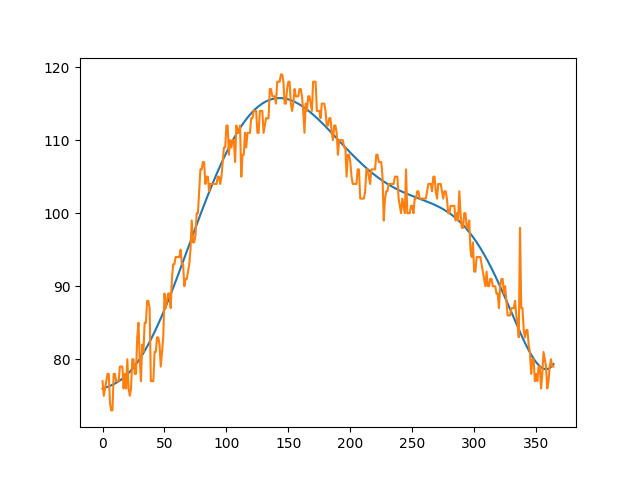

In [734]:
%matplotlib notebook
#plt.plot(df['TAVG'])
plt.plot(np.dot(A,least_sq_svd))
plt.plot(grouped_max["TMAX"])
#plt.plot(seq,np.dot(A,x)-b)

In [735]:
b=grouped_min["TMIN"].tolist()

In [736]:
b

[32.0,
 30.0,
 31.0,
 33.0,
 34.0,
 28.0,
 31.0,
 32.0,
 33.0,
 32.0,
 31.0,
 33.0,
 34.0,
 35.0,
 34.0,
 33.0,
 33.0,
 33.0,
 31.0,
 33.0,
 30.0,
 30.0,
 31.0,
 32.0,
 31.0,
 30.0,
 36.0,
 30.0,
 35.0,
 35.0,
 37.0,
 36.0,
 37.0,
 39.0,
 38.0,
 37.0,
 37.0,
 33.0,
 31.0,
 32.0,
 35.0,
 36.0,
 35.0,
 37.0,
 38.0,
 35.0,
 35.0,
 36.0,
 34.0,
 43.0,
 41.0,
 39.0,
 41.0,
 41.0,
 39.0,
 41.0,
 38.0,
 44.0,
 43.0,
 42.0,
 41.0,
 45.0,
 42.0,
 43.0,
 44.0,
 44.0,
 44.0,
 41.0,
 38.0,
 43.0,
 43.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 49.0,
 48.0,
 47.0,
 49.0,
 46.0,
 49.0,
 50.0,
 53.0,
 51.0,
 51.0,
 54.0,
 55.0,
 50.0,
 54.0,
 53.0,
 55.0,
 52.0,
 52.0,
 54.0,
 54.0,
 53.0,
 51.0,
 50.0,
 54.0,
 52.0,
 55.0,
 56.0,
 55.0,
 53.0,
 59.0,
 58.0,
 50.0,
 52.0,
 55.0,
 57.0,
 58.0,
 59.0,
 58.0,
 58.0,
 62.0,
 61.0,
 64.0,
 61.0,
 58.0,
 59.0,
 61.0,
 60.0,
 61.0,
 64.0,
 65.0,
 66.0,
 67.0,
 67.0,
 68.0,
 68.0,
 66.0,
 58.0,
 64.0,
 65.0,
 67.0,
 68.0,
 66.0,
 69.0,
 68.0,
 69.0,
 67.0,
 66.0,

<IPython.core.display.Javascript object>


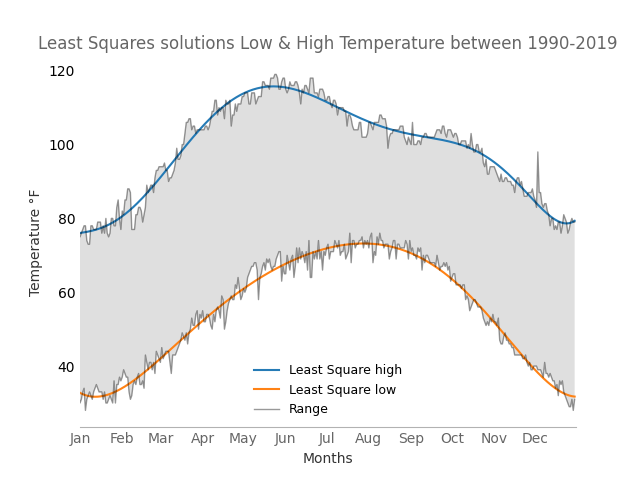

In [737]:
%matplotlib notebook
#plt.plot(df['TAVG'])
#plt.plot(np.dot(A,least_sq_svd))
plt.plot(np.dot(A,least_sq_svd),alpha =8.0,label='Least Square high')
#plt.plot(grouped_max["TMAX"])
#plt.plot(grouped_min["TMIN"])

In [738]:
U,sigma,Vt=np.linalg.svd(A,full_matrices=False)
Utb=np.matmul(U.transpose(),b)
omega=Utb/sigma
least_sq_svd=np.dot(inv(Vt),omega)
np.linalg.norm(np.dot(A,least_sq_svd)-b,2)
least_sq_svd

array([ 5.06923230e-17,  9.19822455e-13, -1.01067947e-09,  4.30412241e-07,
       -9.53824087e-05,  1.05569180e-02, -2.19442946e-01,  3.29658258e+01])

In [739]:
TMIN_Least_Squares=np.dot(A,least_sq_svd)

In [760]:
plt.plot(np.dot(A,least_sq_svd),alpha =8.0,label='Least Square low')
plt.plot(grouped_max["TMAX"], '-',color ='k', alpha = 0.4,  linewidth=1,label='Range')
plt.legend(loc = 8, fontsize=9, frameon=False)
plt.plot(grouped_min["TMIN"], '-',color ='k', alpha = 0.4,  linewidth=1,label='LOW')

plt.fill_between(grouped_min.index, 
                       grouped_min['TMIN'], grouped_max['TMAX'], 
                       facecolor='gray', 
                       alpha=0.25)
plt.scatter(record_high.index,record_high['TMAX'], color = 'r', s = 15, label ='NEW High')
plt.scatter(record_low.index,record_low['TMIN'], color = 'b', s = 15,label ='NEW High')



In [761]:
#getiing the axis
ax1 = plt.gca() # Primary axes
#ax2 = ax1.twinx() 

In [762]:
#ax2.fill_between(grouped_min.index, 
#                       grouped_min['TMIN'], grouped_max['TMAX'], 
 #                      facecolor='gray', 
#                       alpha=0.25)

In [763]:
ax1.set_title('Least Squares solutions Low & High Temperature between 1990-2019', alpha =0.6)

Text(0.5, 1.0, 'Least Squares solutions Low & High Temperature between 1990-2019')

In [764]:
# invisible Frame
#for spine in ax2.spines:
    #ax2.spines[spine].set_visible(False)
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
    
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_alpha(0.3)

In [765]:
ax1.set_xlabel('Months', alpha = 0.8)
ax1.set_ylabel('Temperature °F' , alpha = 0.8)

Text(38.347222222222214, 0.5, 'Temperature °F')

In [746]:
#leg = ax2.legend(labels = ['Upper Bound','Lower Bound'], frameon = False, fontsize = 'x-small')
plt.show()

In [747]:
# Removing Ticks
ax1.tick_params(axis=u'both', which=u'both',length=0)
#ax2.tick_params(axis=u'both', which=u'both',length=0)

In [748]:
#plt.savefig('visual_just_least.pdf')

In [749]:
#plt.plot(grouped_max["TMAX"], alpha =0.25)
#plt.plot(grouped_min["TMIN"], alpha =0.25)

In [750]:
ax1.set_xlim(1,365)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks_labels, alpha = 0.6)
#ax1.set_xticklabels(xticks_labels, alpha = 0.6)

[Text(1, 0, 'Jan'),
 Text(32, 0, 'Feb'),
 Text(60, 0, 'Mar'),
 Text(91, 0, 'Apr'),
 Text(121, 0, 'May'),
 Text(152, 0, 'Jun'),
 Text(182, 0, 'Jul'),
 Text(213, 0, 'Aug'),
 Text(244, 0, 'Sep'),
 Text(274, 0, 'Oct'),
 Text(305, 0, 'Nov'),
 Text(335, 0, 'Dec')]

In [751]:
#plt.legend(['Least Square high','Least Square TMIN','Low (2009-2019)','High (2009-2019)','Record High','Record Low'],loc=8)
#plt.legend(loc = 8, fontsize=18, frameon=False)

In [752]:
np.linalg.norm(grouped_max["TMAX"]-TMAX_Least_Squares)

47.38207614759027

In [753]:
np.linalg.norm(grouped_min["TMIN"]-TMIN_Least_Squares)

42.21995514494938

In [754]:
plt.savefig('least_squares8.png')

<IPython.core.display.Javascript object>


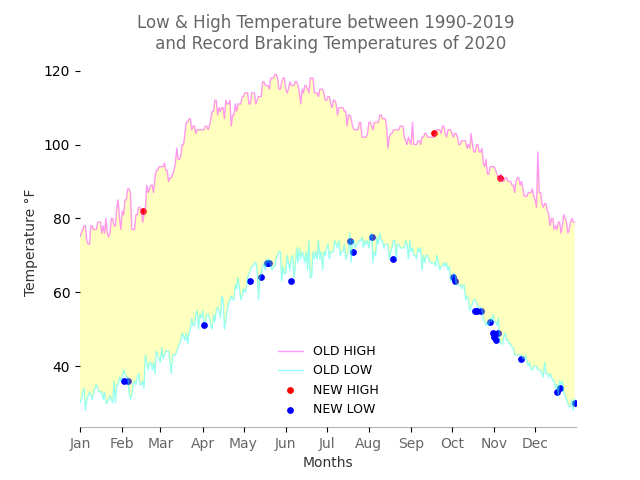

Text(0, 0.5, 'Temperature °F')

In [755]:
%matplotlib notebook
#plt.plot(TMAX_Least_Squares,alpha =8.0,label='Least Square high')
#plt.plot(TMIN_Least_Squares,alpha =8.0,label='Least Square high')
plt.plot(grouped_max["TMAX"], '-',color ='magenta', alpha = 0.4,  linewidth=1,label='OLD HIGH')
plt.plot(grouped_min["TMIN"], '-',color ='cyan', alpha = 0.4,  linewidth=1,label='OLD LOW')
plt.scatter(record_high.index,record_high['TMAX'], color = 'r', s = 15, label ='NEW HIGH')
plt.scatter(record_low.index,record_low['TMIN'], color = 'b', s = 15,label ='NEW LOW')
plt.legend(loc=8,fontsize=9, frameon=False)
#getiing the axis
ax1 = plt.gca() # Primary axes
#ax2 = ax1.twinx()
ax1.set_title('Low & High Temperature between 1990-2019 \n and Record Braking Temperatures of 2020', alpha =0.6)
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
    
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_alpha(0.3)
ax1.set_xlim(1,365)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks_labels, alpha = 0.6)
#ax1.set_xticklabels(xticks_labels, alpha = 0.6)
ax1.fill_between(grouped_min.index, 
                       grouped_min['TMIN'], grouped_max['TMAX'], 
                       facecolor='yellow', 
                       alpha=0.25)
ax1.set_xlabel('Months', alpha = 0.8)
ax1.set_ylabel('Temperature °F' , alpha = 0.8)

In [756]:
plt.savefig('JUST_Visual_for_Punjab.pdf')

<IPython.core.display.Javascript object>


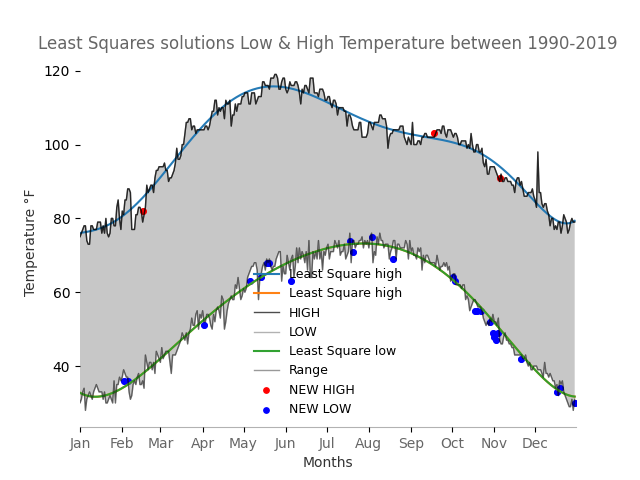

Text(0, 0.5, 'Temperature °F')

In [757]:
%matplotlib notebook
plt.plot(TMAX_Least_Squares,alpha =8.0,label='Least Square high')
plt.plot(TMIN_Least_Squares,alpha =8.0,label='Least Square high')
plt.plot(grouped_max["TMAX"], '-',color ='k', alpha = 0.7,  linewidth=1,label='HIGH')
plt.plot(grouped_min["TMIN"], '-',color ='k', alpha = 0.3,  linewidth=1,label='LOW')
plt.scatter(record_high.index,record_high['TMAX'], color = 'r', s = 15, label ='NEW HIGH')
plt.scatter(record_low.index,record_low['TMIN'], color = 'b', s = 15,label ='NEW LOW')
plt.legend(loc=8,fontsize=9, frameon=False)
#getiing the axis
ax1 = plt.gca() # Primary axes
#ax2 = ax1.twinx()
ax1.set_title('Least Squares solutions, Low & High Temperature between 1990-2019 &\n Record Breaking Temperatures of 2020', alpha =0.6)
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
    
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_alpha(0.3)
ax1.set_xlim(1,365)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks_labels, alpha = 0.6)
#ax1.set_xticklabels(xticks_labels, alpha = 0.6)
ax1.fill_between(grouped_min.index, 
                       grouped_min['TMIN'], grouped_max['TMAX'], 
                       facecolor='grey', 
                       alpha=0.25)
ax1.set_xlabel('Months', alpha = 0.8)
ax1.set_ylabel('Temperature °F' , alpha = 0.8)

In [759]:
plt.savefig('everything_punjab_.png')